In [1]:
import tensorflow as tf

2023-06-26 20:15:19.627833: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-26 20:15:19.651921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 20:15:20.003983: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [43]:
from tensorflow import keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('./torch-v1.8.0.csv')

In [23]:
data.head()

,API Name,Parameters,Test case,Label,combintedString
0,torch.nn.functional.max_pool3d,"arg_0_tensor = torch.rand([20, 16, 50, 44, 31]...",v1.8.0/cuda-oracle/success/torch.nn.functional...,success,torch.nn.functional.max_pool3darg_0_tensor = t...
1,torch.nn.functional.max_pool3d,"arg_0_tensor = torch.rand([20, 16, 50, 44, 31]...",v1.8.0/cuda-oracle/success/torch.nn.functional...,success,torch.nn.functional.max_pool3darg_0_tensor = t...
2,torch.nn.functional.max_pool3d,"arg_0_tensor = torch.rand([20, 16, 51, 33, 15]...",v1.8.0/cuda-oracle/success/torch.nn.functional...,success,torch.nn.functional.max_pool3darg_0_tensor = t...
3,torch.nn.functional.max_pool3d,"arg_0_tensor = torch.rand([20, 16, 51, 33, 15]...",v1.8.0/FreeFuzz_bugs/torch.nn.functional.max_p...,bug,torch.nn.functional.max_pool3darg_0_tensor = t...
4,torch.isneginf,"arg_0_tensor = torch.rand([3], dtype=torch.flo...",v1.8.0/cuda-oracle/success/torch.isneginf/1.py,success,"torch.isneginfarg_0_tensor = torch.rand([3], d..."


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44143 entries, 0 to 44142
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   API Name    44143 non-null  object
 1   Parameters  41096 non-null  object
 2   Test case   44143 non-null  object
 3   Label       44143 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [8]:
data.iloc[:,-1].value_counts()

success    42666
bug         1477
Name: Label, dtype: int64

In [20]:
data.iloc[:, -2].head()

0    success
1    success
2    success
3        bug
4    success
Name: Label, dtype: object

In [13]:
data.iloc[:, -1].replace("success",1).replace("bug",0).head()

0    1
1    1
2    1
3    0
4    1
Name: Label, dtype: int64

In [17]:
data['combintedString']=data[['API Name','Parameters']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)

In [18]:
data.head()

,API Name,Parameters,Test case,Label,combintedString
0,torch.nn.functional.max_pool3d,"arg_0_tensor = torch.rand([20, 16, 50, 44, 31]...",v1.8.0/cuda-oracle/success/torch.nn.functional...,success,torch.nn.functional.max_pool3darg_0_tensor = t...
1,torch.nn.functional.max_pool3d,"arg_0_tensor = torch.rand([20, 16, 50, 44, 31]...",v1.8.0/cuda-oracle/success/torch.nn.functional...,success,torch.nn.functional.max_pool3darg_0_tensor = t...
2,torch.nn.functional.max_pool3d,"arg_0_tensor = torch.rand([20, 16, 51, 33, 15]...",v1.8.0/cuda-oracle/success/torch.nn.functional...,success,torch.nn.functional.max_pool3darg_0_tensor = t...
3,torch.nn.functional.max_pool3d,"arg_0_tensor = torch.rand([20, 16, 51, 33, 15]...",v1.8.0/FreeFuzz_bugs/torch.nn.functional.max_p...,bug,torch.nn.functional.max_pool3darg_0_tensor = t...
4,torch.isneginf,"arg_0_tensor = torch.rand([3], dtype=torch.flo...",v1.8.0/cuda-oracle/success/torch.isneginf/1.py,success,"torch.isneginfarg_0_tensor = torch.rand([3], d..."


In [21]:
x=data.iloc[:, -1]
y=data.iloc[:, -2].replace("success",1).replace("bug",0)

In [22]:
x.shape

(44143,)

In [24]:
import re

In [25]:
token = re.compile('[A-Za-z]+|[!?,.()]')

In [26]:
def reg_text(text):
    new_text = token.findall(text)
    new_text = [word.lower() for word in new_text]
    return new_text

In [27]:
data['text'] = data.combintedString.apply(reg_text)

In [30]:
word_set = set()
for text in data.text:
    for word in text:
        word_set.add(word) 

In [32]:
max_word = len(word_set) + 1
max_word

508

In [33]:
word_list = list(word_set)

In [35]:
word_list.index('arg')

439

In [36]:
word_index =  dict((word, word_list.index(word) + 1) for word in word_list)

In [37]:
word_index

{'softshrinknan': 1,
 'constant': 2,
 'inplace': 3,
 'atleast': 4,
 'dotarg': 5,
 'stride': 6,
 'softmaxarg': 7,
 'transpose': 8,
 'tanharg': 9,
 'embeddingarg': 10,
 'powerarg': 11,
 'powarg': 12,
 'rnncellarg': 13,
 'nhead': 14,
 'logitarg': 15,
 'triangular': 16,
 'cartesian': 17,
 'targ': 18,
 'isneginfarg': 19,
 'prodarg': 20,
 'false': 21,
 'transformerdecoderlayerd': 22,
 'first': 23,
 'sorted': 24,
 'detarg': 25,
 'unsqueezearg': 26,
 'statenan': 27,
 'convtranspose': 28,
 'rsqrtarg': 29,
 'logical': 30,
 'ones': 31,
 'gearg': 32,
 'logsigmoidnan': 33,
 'layernormarg': 34,
 'argument': 35,
 'ceilarg': 36,
 'layer': 37,
 'gcdarg': 38,
 'ii': 39,
 'bcelossnan': 40,
 'radarg': 41,
 'triu': 42,
 'i': 43,
 'model': 44,
 'bfloat': 45,
 'softminarg': 46,
 'trapzarg': 47,
 'dim': 48,
 'rnnbasearg': 49,
 'deg': 50,
 'randintarg': 51,
 'requires': 52,
 'subarg': 53,
 'kthvaluearg': 54,
 'flattenarg': 55,
 'circular': 56,
 'dropoutp': 57,
 'indices': 58,
 'adaptive': 59,
 'training': 60,


In [38]:
data_ok = data.text.apply(lambda x: [word_index.get(word, 0) for word in x])

In [39]:
len(data_ok.iloc[2])

39

In [40]:
maxlen = max(len(x) for x in data_ok)

In [41]:
maxlen

14262

In [44]:
data_ok = keras.preprocessing.sequence.pad_sequences(data_ok.values, maxlen=maxlen)

In [45]:
data_ok.shape

(44143, 14262)

In [52]:
y.review.values

AttributeError: 'Series' object has no attribute 'review'

In [46]:
model = tf.keras.Sequential()

2023-06-26 22:20:36.377249: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 22:20:36.395984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 22:20:36.396079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_word, 50, input_length=maxlen))
model.add(tf.keras.layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling1D(3))
model.add(tf.keras.layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 14262, 50)         25400     
                                                                 
 conv1d_2 (Conv1D)           (None, 14262, 32)         11232     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4754, 32)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 4754, 32)          7200      
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                

In [56]:
model.compile(optimizer=keras.optimizers.RMSprop(),loss='binary_crossentropy',metrics=['acc'])#accuricy

In [57]:
history=model.fit(data_ok,y,epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
276/276 [==============================] - 16s 57ms/step - loss: 0.1559 - acc: 0.9664 - val_loss: 0.1898 - val_acc: 0.9537
Epoch 2/10
276/276 [==============================] - 12s 43ms/step - loss: 0.1369 - acc: 0.9698 - val_loss: 0.1902 - val_acc: 0.9537
Epoch 3/10
276/276 [==============================] - 12s 42ms/step - loss: 0.1366 - acc: 0.9698 - val_loss: 0.1989 - val_acc: 0.9537
Epoch 4/10
276/276 [==============================] - 12s 42ms/step - loss: 0.1363 - acc: 0.9698 - val_loss: 0.1980 - val_acc: 0.9537
Epoch 5/10
276/276 [==============================] - 12s 42ms/step - loss: 0.1364 - acc: 0.9698 - val_loss: 0.1921 - val_acc: 0.9537
Epoch 6/10
276/276 [==============================] - 12s 43ms/step - loss: 0.1364 - acc: 0.9698 - val_loss: 0.1983 - val_acc: 0.9537
Epoch 7/10
276/276 [==============================] - 12s 42ms/step - loss: 0.1365 - acc: 0.9698 - val_loss: 0.1961 - val_acc: 0.9537
Epoch 8/10
276/276 [==============================] - 12s 42ms

In [58]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

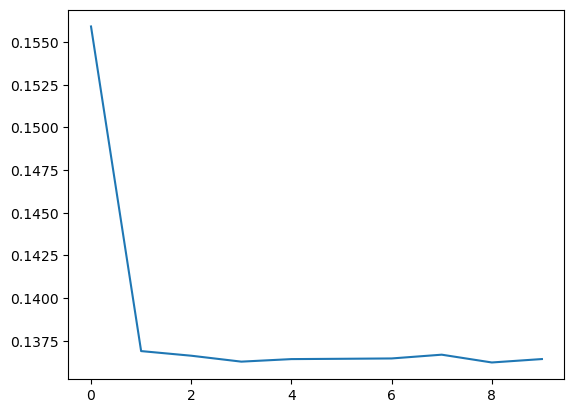

In [59]:
plt.plot(history.epoch,history.history.get('loss'))

In [60]:
model.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x7f7193a8fa30>>

In [ ]:
#for test data

In [ ]:
test_data=pd.read_csv('./torch-testdata.csv')